<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Diversi%C3%B3n/Juego_con_2_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
iteraciones=20000
Dado1=np.zeros(iteraciones)
Dado2=np.zeros(iteraciones)
Suma=np.zeros(iteraciones)
for i in range(0,iteraciones):
  Dado1[i]=random.randint(1,6)
  Dado2[i]=random.randint(1,6)
  Suma[i]=Dado1[i]+Dado2[i]

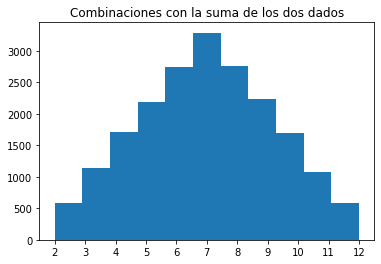

In [ ]:
plt.hist(Suma,bins=11)
plt.title('Combinaciones con la suma de los dos dados')
plt.xticks(range(2,13))
plt.show()

In [ ]:
Todos=np.concatenate((Dado1,Dado2,Suma),axis=0)

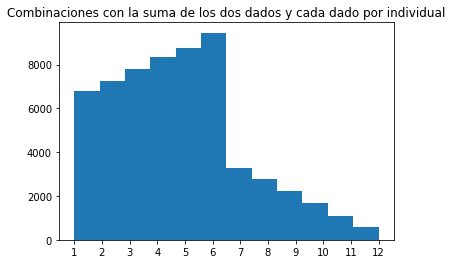

In [ ]:
plt.hist(Todos,bins=12)
plt.title('Combinaciones con la suma de los dos dados y cada dado por individual')
plt.xticks(range(1,13))
plt.show()

In [ ]:
Pares=np.zeros(iteraciones)
for i in range(0,iteraciones):
  if Dado1[i]==Dado2[i]:
    Pares[i]=Dado1[i]

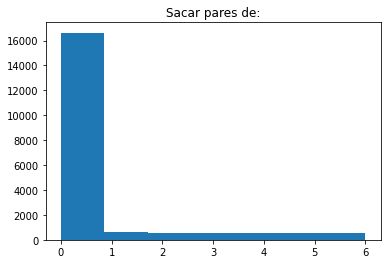

In [ ]:
plt.hist(Pares,bins=7)
plt.title('Sacar pares de:')
plt.show()

In [ ]:
PPar=sum(Pares>0)/len(Pares)*100
print('La probabilidad de obtener par en un lanzamiento es de:',PPar,'%')

La probabilidad de obtener par en un lanzamiento es de: 16.865 %


In [ ]:
P=np.zeros(12)
for j in range(1,13):
  P[j-1]=round(sum(Todos==j)/len(Todos)*100,2)
print(P)

[11.29 12.06 13.02 13.89 14.6  15.76  5.48  4.61  3.73  2.82  1.78  0.96]


In [ ]:
DF=pd.DataFrame({'Valor':range(1,13),'Probabilidad (%)':P})
DF.set_index('Valor',inplace=True)
DF.loc['Par']=PPar
DF

,Probabilidad (%)
Valor,
1,11.290
2,12.060
3,13.020
4,13.890
5,14.600
6,15.760
7,5.480
8,4.610
9,3.730


In [ ]:
Numero=np.zeros(12)
Par=0
iteracion=0
for i in range(1,7):
  for j in range(1,7):
    Numero[i-1]=Numero[i-1]+1
    Numero[j-1]=Numero[j-1]+1
    Numero[i+j-1]=Numero[i+j-1]+1
    if i==j:
      Par=Par+1
    iteracion=iteracion+1

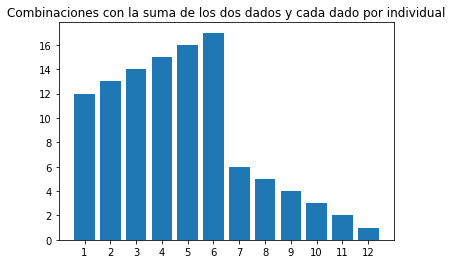

In [ ]:
plt.bar(range(1,13),Numero)
plt.xticks(range(1,13))
plt.title('Combinaciones con la suma de los dos dados y cada dado por individual')
plt.show()

In [ ]:
DF1=pd.DataFrame({'Valor':range(1,13),'Probabilidad (%)':np.around(Numero/sum(Numero)*100,2)})
DF1.set_index('Valor',inplace=True)
DF1.loc['Par']=round(Par/iteracion*100,2)
DF1

,Probabilidad (%)
Valor,
1,11.11
2,12.04
3,12.96
4,13.89
5,14.81
6,15.74
7,5.56
8,4.63
9,3.70


In [ ]:
DF1['Simulación']=DF['Probabilidad (%)']
DF1['% Error']=(DF1['Probabilidad (%)']-DF1['Simulación'])/DF1['Probabilidad (%)']*100

In [ ]:
DF1

,Probabilidad (%),Simulación,% Error
Valor,,,
1,11.11,11.290,-1.620162
2,12.04,12.060,-0.166113
3,12.96,13.020,-0.462963
4,13.89,13.890,0.000000
5,14.81,14.600,1.417961
6,15.74,15.760,-0.127065
7,5.56,5.480,1.438849
8,4.63,4.610,0.431965
9,3.70,3.730,-0.810811


In [ ]:
sum(DF1['Probabilidad (%)'].iloc[0:12])

100.0